In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
PR_HS_LEN_performance = pd.read_csv('data/performance_PR_HS_LEN2.csv.gz')
#PR_HS_LEN_performance = PR_HS_LEN_performance[PR_HS_LEN_performance.tot_comments<200]
PR_HS_LEN_performance = PR_HS_LEN_performance.sort_values('tot_comments')
PR_HS_LEN_performance.shape

(383, 5)

In [43]:
RevRank_performance = pd.read_csv('data/performance_revRank.csv.gz')
#RevRank_performance = RevRank_performance[RevRank_performance.tot_product<200]
RevRank_performance = RevRank_performance.sort_values('tot_product')
RevRank_performance.shape

(383, 4)

## Log Chart

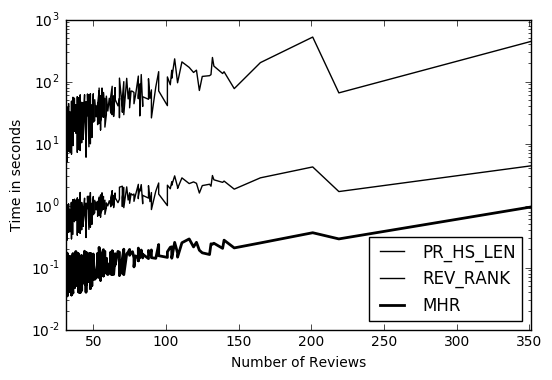

In [66]:
fig, ax = plt.subplots()
labels = []

ax = PR_HS_LEN_performance.plot(ax=ax, kind='line', x='tot_comments', y='elapsed_phl', c="k")
labels.append("PR_HS_LEN")

ax = RevRank_performance.plot(ax=ax, kind='line', x='tot_product', y='time', c="k")
labels.append("REV_RANK")

ax = PR_HS_LEN_performance.plot(ax=ax, kind='line', x='tot_comments', y='elapsed_mhr', c="k", linewidth=2)
labels.append("MHR")

lines, _ = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
ax.set_xlabel("Number of Reviews")
ax.set_ylabel("Time in seconds")
ax.set_yscale('log')
plt.show()

## Smooth Log Chart

In [45]:
def smooth(x,beta):
    """ kaiser window smoothing """
    window_len=11
    # extending the data at beginning and at the end
    # to apply the window at the borders
    s = np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    w = np.kaiser(window_len,beta)
    y = np.convolve(w/w.sum(),s,mode='valid')
    return y[5:len(y)-5]

In [46]:
PR_HS_LEN_performance['smooth_mhr'] = smooth(PR_HS_LEN_performance['elapsed_mhr'].values,25)
PR_HS_LEN_performance['smooth_phl'] = smooth(PR_HS_LEN_performance['elapsed_phl'].values,25)
PR_HS_LEN_performance['smooth_rev'] = smooth(RevRank_performance['time'].values,25)

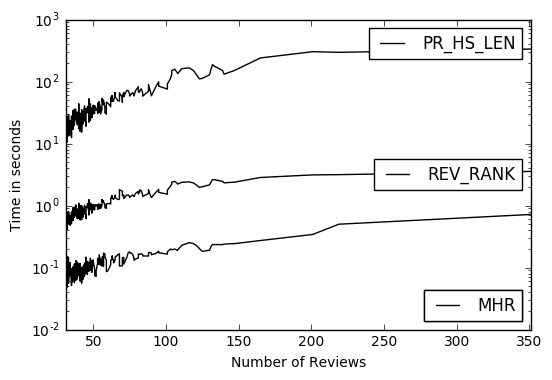

In [88]:
fig, ax = plt.subplots()

PR_HS_LEN_performance.plot(ax=ax, kind='line', x='tot_comments', y='smooth_phl', c="k")
PR_HS_LEN_performance.plot(ax=ax, kind='line', x='tot_comments', y='smooth_rev', c="k")
PR_HS_LEN_performance.plot(ax=ax, kind='line', x='tot_comments', y='smooth_mhr', c="k")

ax.set_xlabel("Number of Reviews")
ax.set_ylabel("Time in seconds")
ax.set_yscale('log')

first_legend = plt.legend(['PR_HS_LEN'], loc='upper right')
ax = plt.gca().add_artist(first_legend)

second_legend = plt.legend(['REV_RANK'], loc='center right')
ax = plt.gca().add_artist(second_legend)

third_legend = plt.legend(['MHR'], loc='lower right')
ax = plt.gca().add_artist(third_legend)

plt.show()